<a href="https://colab.research.google.com/github/VishalSinhaRoy/Customer-Purchase-Behavior-Analysis-EDA/blob/main/Applied_Statistics(Assgn_M5)(Vishal's).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import scipy.stats as stats

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading csv file from google drive
df_original=pd.read_csv('/content/drive/MyDrive/superstore_marketing_datasheet.csv')

In [ ]:
# Making a copy of the Data Frame by intacting the original
df_superstore=df_original.copy()

In [ ]:
# Displaying the top view
df_superstore.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Displaying he bottow view
df_superstore.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


In [ ]:
# Dimension of Dataframe by showing number of Rows & Columns
df_superstore.shape

(2240, 22)

In [ ]:
# Displays the consise summary of Dataframe
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Calculating the null attributes
df_superstore.isnull().sum().sort_values(ascending=False)

Income                 24
Id                      0
MntFishProducts         0
Response                0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
NumDealsPurchases       0
MntGoldProds            0
MntSweetProducts        0
MntMeatProducts         0
Year_Birth              0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Complain                0
dtype: int64

In [ ]:
# Checking the duplicates
df_superstore.duplicated().sum()

0

In [ ]:
# Handling the Null values
df_superstore['Income']=df_superstore['Income'].fillna(df_superstore['Income'].mean())

In [ ]:
df_superstore.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [ ]:
# Gives statistical summary of all the numerical columns of the Dataframe
df_superstore.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
# Gives statistical summary of all the categorical columns of the Dataframe
df_superstore.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,401
top,Graduation,Married,########
freq,1127,864,916


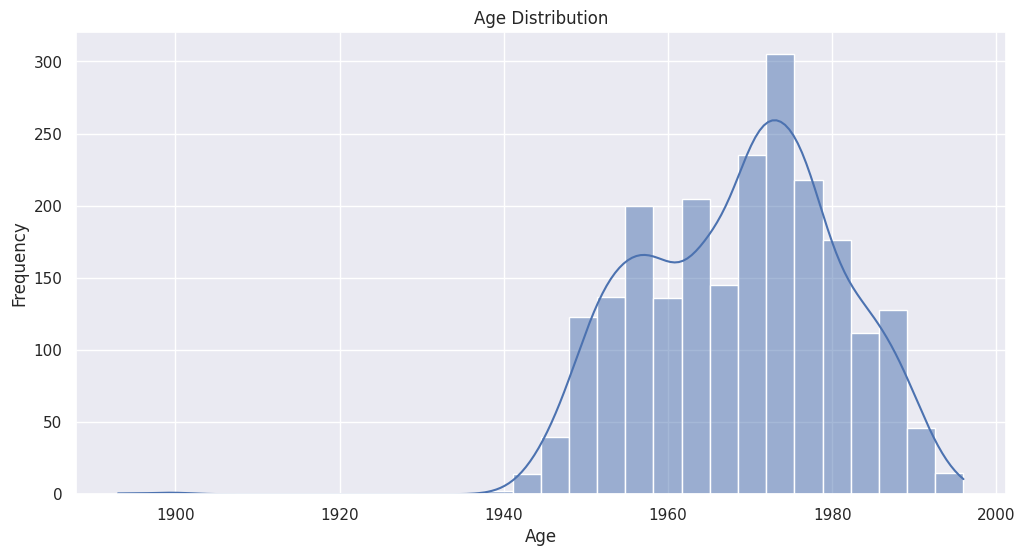

In [ ]:
# Visualization of age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_superstore['Year_Birth'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-38-30225ffebe0a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df_superstore, palette='viridis')


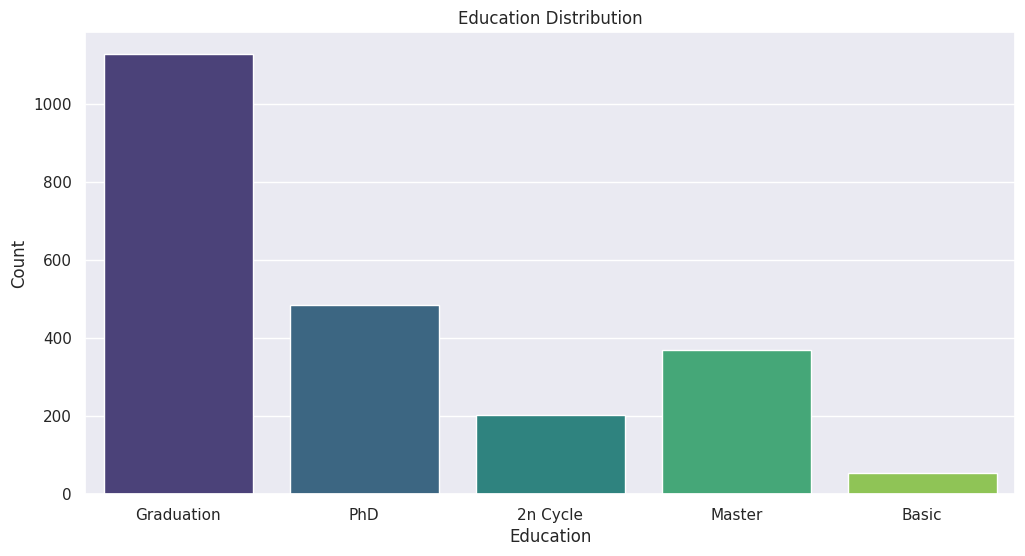

In [ ]:
# # Visualization of education distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Education', data=df_superstore, palette='viridis')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

<ipython-input-43-5c534874a124>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=df_superstore, palette='magma')


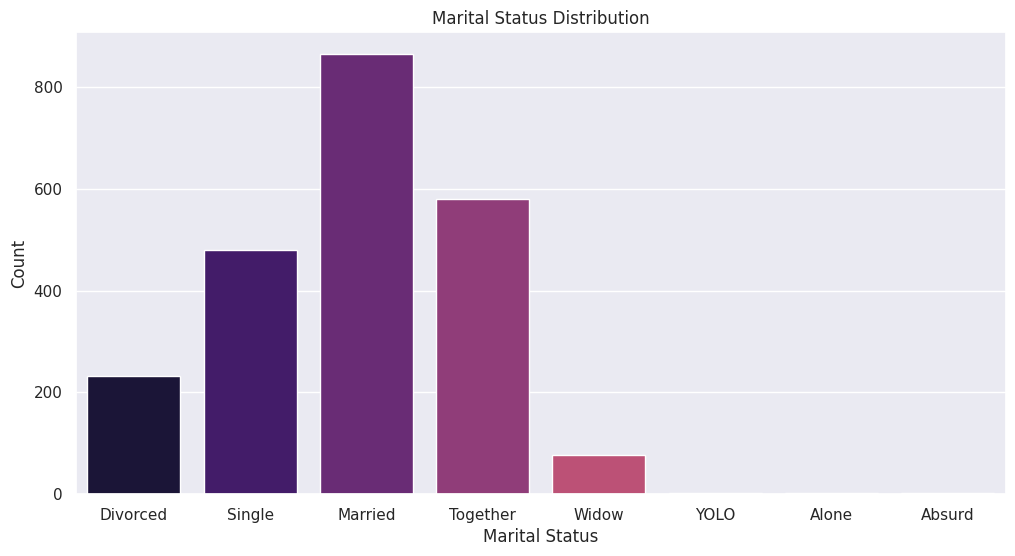

In [ ]:
# Visualization of marital status distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Marital_Status', data=df_superstore, palette='magma')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
# Gives are the clolumn label names present in the Dataframe
df_superstore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# Extracting relevant numerical columns
key_variables=['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response']

# Calculating statistics for the numerical columns
numerical_stats=df_superstore[key_variables].agg(['mean', 'median', 'var', 'std']).transpose()

# Adding mode separately
modes=df_superstore[key_variables].mode().iloc[0]  # Taking the first mode value for each column
numerical_stats['mode'] = modes

# Renaming index and columns names
numerical_stats.index.name='Variables'
numerical_stats.columns=['Mean', 'Median', 'Variance', 'Standard Deviation', 'Mode']

# Displaying the stastics
print(numerical_stats)

                             Mean   Median      Variance  Standard Deviation  \
Variables                                                                      
Year_Birth            1968.805804   1970.0  1.436179e+02           11.984069   
Income               52247.251354  51741.5  6.268913e+08        25037.797168   
Recency                 49.109375     49.0  8.388237e+02           28.962453   
MntWines               303.935714    173.5  1.132978e+05          336.597393   
MntFruits               26.302232      8.0  1.581926e+03           39.773434   
MntMeatProducts        166.950000     67.0  5.094743e+04          225.715373   
MntFishProducts         37.525446     12.0  2.984325e+03           54.628979   
MntSweetProducts        27.062946      8.0  1.704080e+03           41.280498   
MntGoldProds            44.021875     24.0  2.721442e+03           52.167439   
NumDealsPurchases        2.325000      2.0  3.733542e+00            1.932238   
NumWebPurchases          4.084821      4

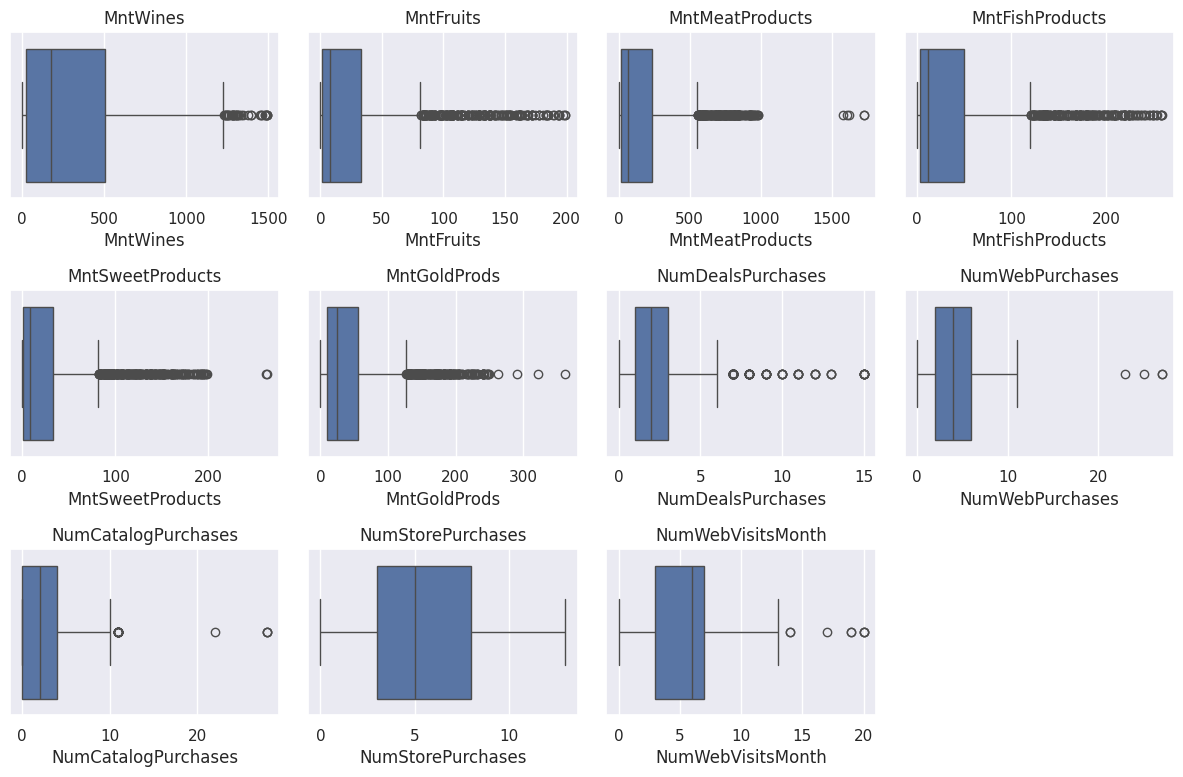

In [ ]:
# Possible outliers for the following columns
outlier_check=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Plotting box plot for outlier detection
plt.figure(figsize=(12, 10))

# Loop through columns for box plot creation
for i, column in enumerate(outlier_check, start=1):
  plt.subplot(4,4,i)
  sns.boxplot(x=df_superstore[column])
  plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Handling Outliers in it

# For loop to detech and remove outliers
for column in outlier_check:
  Q1=df_superstore[column].quantile(0.25)
  Q3=df_superstore[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)

  # Use .loc to modify the Dataframe
  df_superstore.loc[df_superstore[column]<lower_bound, column]=lower_bound
  df_superstore.loc[df_superstore[column]>upper_bound, column]=upper_bound

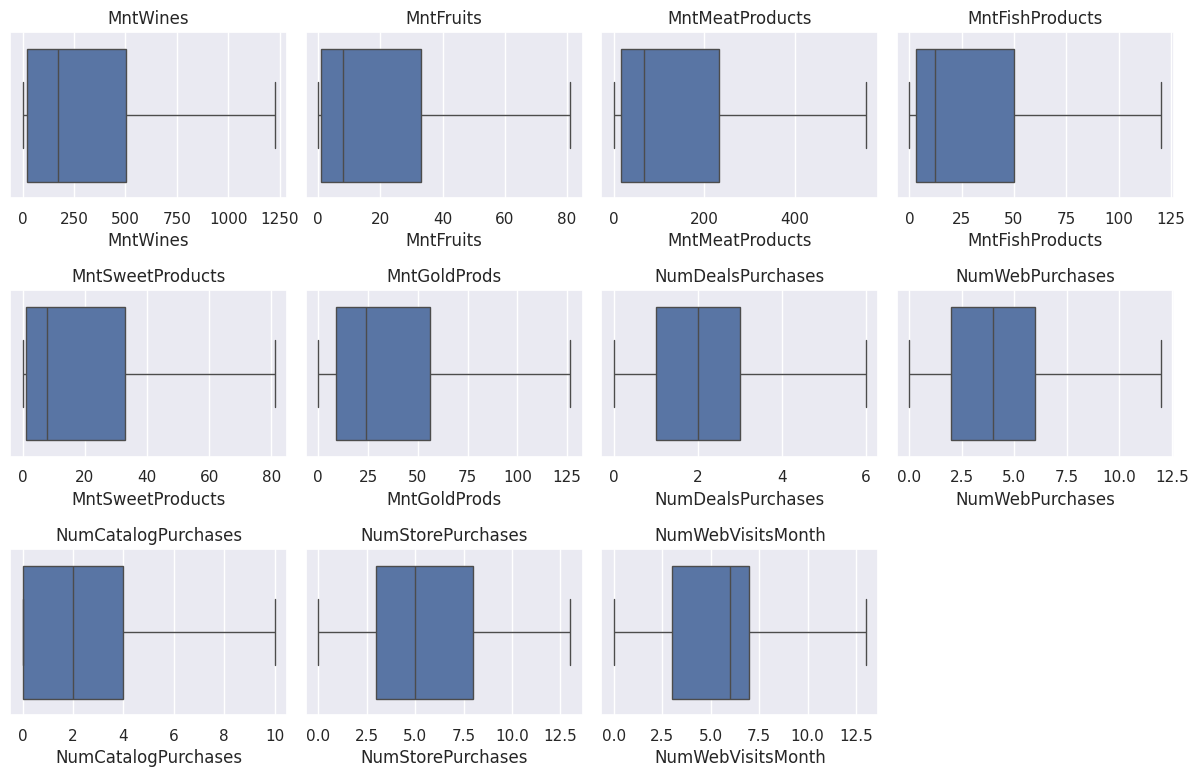

In [ ]:
# Following list of columns
outlier_check=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Plotting box plot after outlier detection
plt.figure(figsize=(12, 10))
for i, column in enumerate(outlier_check, start=1):
  plt.subplot(4,4,i)
  sns.boxplot(x=df_superstore[column])
  plt.title(column)

#show the boxplot
plt.tight_layout()
plt.show()

In [ ]:
# Descriptive stastics after handling outliers
df_superstore.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,302.112946,21.679018,150.873214,32.115848,21.937946,39.487723,2.215625,4.060714,2.624107,5.790179,5.299107,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,331.057356,27.257348,178.816658,40.361485,27.540334,39.927508,1.538671,2.647333,2.734777,3.250958,2.348357,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1225.000000,81.000000,556.000000,120.500000,81.000000,126.500000,6.000000,12.000000,10.000000,13.000000,13.000000,1.000000,1.000000


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
# Distribution of Parameters (Response, Complain)
response_prob=df_superstore['Response'].mean()  # Probability of success (response)

# Probability Mass Function for Bernoulli distribution
prob_success=stats.bernoulli.pmf(1, response_prob)
print(f"Probability of Response = 1 (success): {prob_success:.4f}")

# Expected value (mean) for a Bernoulli distribution
expected_value=stats.bernoulli.mean(response_prob)
print(f"Expected value (mean) for Response: {expected_value:.4f}")

complain_prob=df_superstore['Complain'].mean()  # Probability of success (complain)

# Probability Mass Function for Bernoulli distribution
prob_success=stats.bernoulli.pmf(1, complain_prob)
print(f"Probability of Response = 1 (success): {prob_success:.4f}")

# Expected value (mean) for a Bernoulli distribution
expected_value=stats.bernoulli.mean(complain_prob)
print(f"Expected value (mean) for Response: {expected_value:.4f}")

Probability of Response = 1 (success): 0.1491
Expected value (mean) for Response: 0.1491
Probability of Response = 1 (success): 0.0094
Expected value (mean) for Response: 0.0094


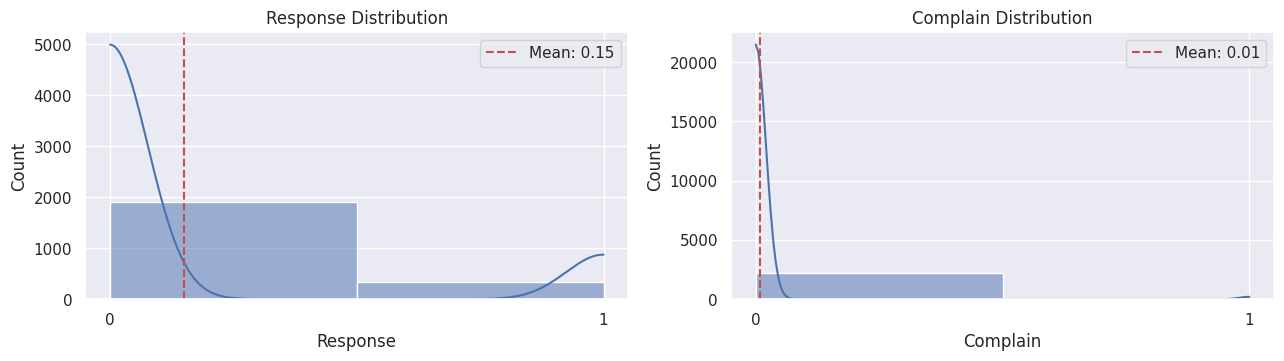

In [ ]:
# Visualization of Parameters
plt.figure(figsize=(13, 10))
# Response Distribution
plt.subplot(3, 2, 1)
sns.histplot(df_superstore['Response'], kde=True, bins=2)
plt.axvline(response_prob, color='r', linestyle='--', label=f'Mean: {response_prob:.2f}')
plt.title('Response Distribution')
plt.xticks([0, 1])
plt.legend()

# Complain Distribution
plt.subplot(3, 2, 2)
sns.histplot(df_superstore['Complain'], kde=True, bins=2)
plt.axvline(complain_prob, color='r', linestyle='--', label=f'Mean: {complain_prob:.2f}')
plt.title('Complain Distribution')
plt.xticks([0, 1])
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Frequency variables
numdeals_lambda=df_superstore['NumDealsPurchases'].mean()
numweb_lambda=df_superstore['NumWebPurchases'].mean()
numcatalog_lambda=df_superstore['NumCatalogPurchases'].mean()
numstore_lambda=df_superstore['NumStorePurchases'].mean()
numwebvisits_lambda=df_superstore['NumWebVisitsMonth'].mean()

# Poisson Distribution for NumDealsPurchases
numdeals_prob=stats.poisson.pmf(3, numdeals_lambda)
numdeals_expected=numdeals_lambda
# Poisson Distribution for NumWebPurchases
numweb_prob=stats.poisson.pmf(3, numweb_lambda)
numweb_expected=numweb_lambda
# Poisson Distribution for NumCatalogPurchases
numcatalog_prob=stats.poisson.pmf(3, numcatalog_lambda)
numcatalog_expected=numcatalog_lambda
# Poisson Distribution for NumStorePurchases
numstore_prob=stats.poisson.pmf(3, numstore_lambda)
numstore_expected=numstore_lambda
# Poisson Distribution for NumWebVisitsMonth
numwebvisits_prob=stats.poisson.pmf(3, numwebvisits_lambda)
numwebvisits_expected=numwebvisits_lambda

# Collecting results
results = {
    'NumDealsPurchases Probability (3 purchases)': numdeals_prob,
    'NumDealsPurchases Expected': numdeals_expected,
    'NumCatalogPurchases Probability (3 purchases)': numcatalog_prob,
    'NumCatalogPurchases Expected': numcatalog_expected,
    'NumWebPurchases Probability (3 purchases)': numweb_prob,
    'NumWebPurchases Expected': numweb_expected,
    'NumStorePurchases Probability (3 purchases)': numstore_prob,
    'NumStorePurchases Expected': numstore_expected,
    'NumWebVisitsMonth Probability (3 purchases)': numwebvisits_prob,
    'NumWebVisitsMonth Expected': numwebvisits_expected
    }

# Displaying results
for key, value in results.items():
    print(f'{key}: {value:.2f}')

NumDealsPurchases Probability (3 purchases): 0.20
NumDealsPurchases Expected: 2.22
NumCatalogPurchases Probability (3 purchases): 0.22
NumCatalogPurchases Expected: 2.62
NumWebPurchases Probability (3 purchases): 0.19
NumWebPurchases Expected: 4.06
NumStorePurchases Probability (3 purchases): 0.10
NumStorePurchases Expected: 5.79
NumWebVisitsMonth Probability (3 purchases): 0.12
NumWebVisitsMonth Expected: 5.30


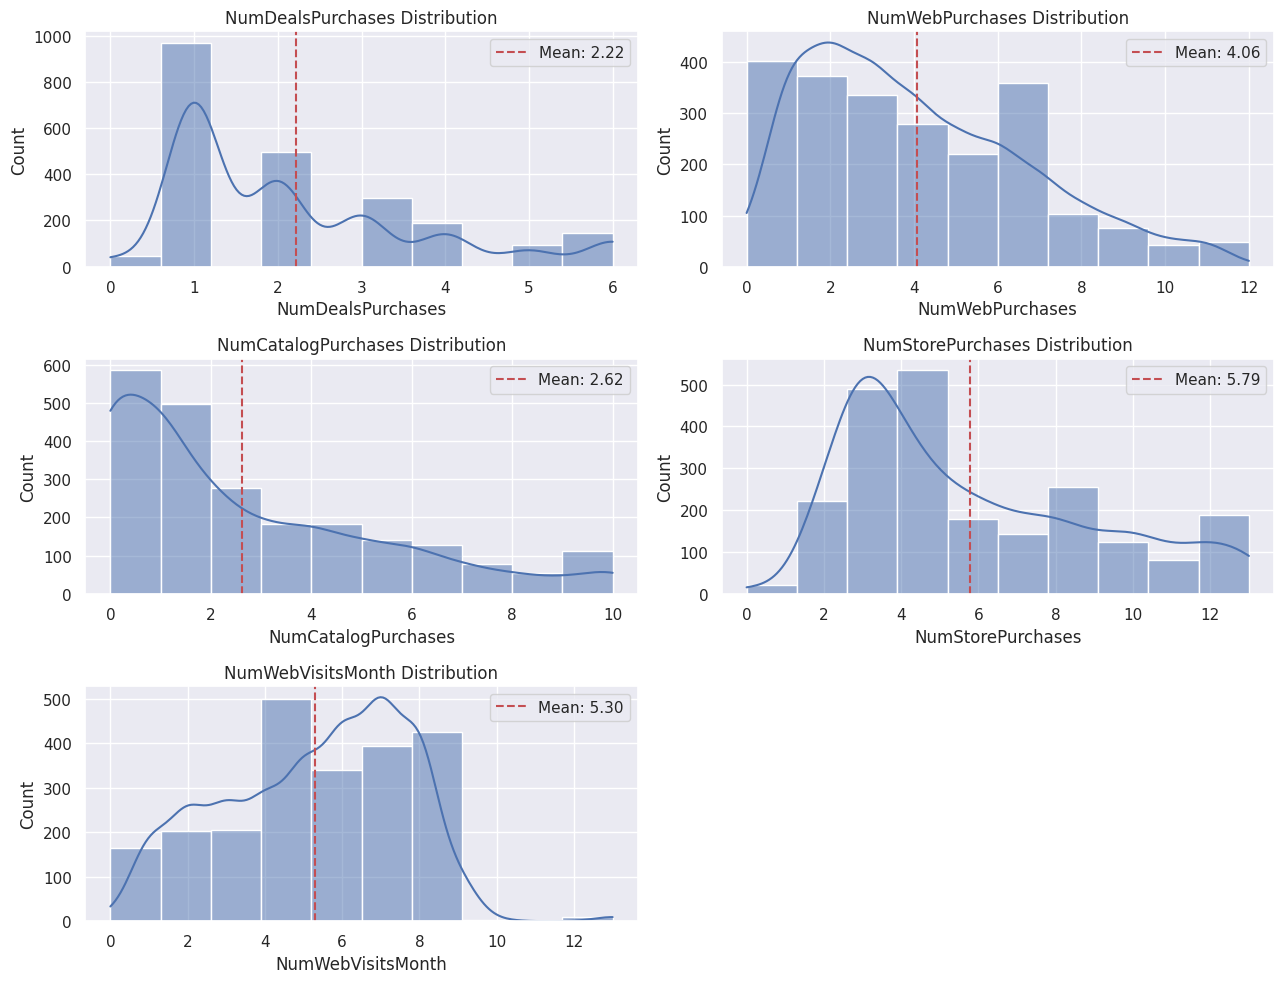

In [ ]:
# Visualization of Frequency Variables
plt.figure(figsize=(13, 10))

# NumDealsPurchases Distribution
plt.subplot(3, 2, 1)
sns.histplot(df_superstore['NumDealsPurchases'], kde=True, bins=10)
plt.axvline(numdeals_lambda, color='r', linestyle='--', label=f'Mean: {numdeals_lambda:.2f}')
plt.title('NumDealsPurchases Distribution')
plt.legend()

# NumWebPurchases Distribution
plt.subplot(3, 2, 2)
sns.histplot(df_superstore['NumWebPurchases'], kde=True, bins=10)
plt.axvline(numweb_lambda, color='r', linestyle='--', label=f'Mean: {numweb_lambda:.2f}')
plt.title('NumWebPurchases Distribution')
plt.legend()

# NumCatalogPurchases Distribution
plt.subplot(3, 2, 3)
sns.histplot(df_superstore['NumCatalogPurchases'], kde=True, bins=10)
plt.axvline(numcatalog_lambda, color='r', linestyle='--', label=f'Mean: {numcatalog_lambda:.2f}')
plt.title('NumCatalogPurchases Distribution')
plt.legend()

# NumStorePurchases Distribution
plt.subplot(3, 2, 4)
sns.histplot(df_superstore['NumStorePurchases'], kde=True, bins=10)
plt.axvline(numstore_lambda, color='r', linestyle='--', label=f'Mean: {numstore_lambda:.2f}')
plt.title('NumStorePurchases Distribution')
plt.legend()

# NumWebVisitsMonth Distribution
plt.subplot(3, 2, 5)
sns.histplot(df_superstore['NumWebVisitsMonth'], kde=True, bins=10)
plt.axvline(numwebvisits_lambda, color='r', linestyle='--', label=f'Mean: {numwebvisits_lambda:.2f}')
plt.title('NumWebVisitsMonth Distribution')
plt.legend()

plt.tight_layout()
plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

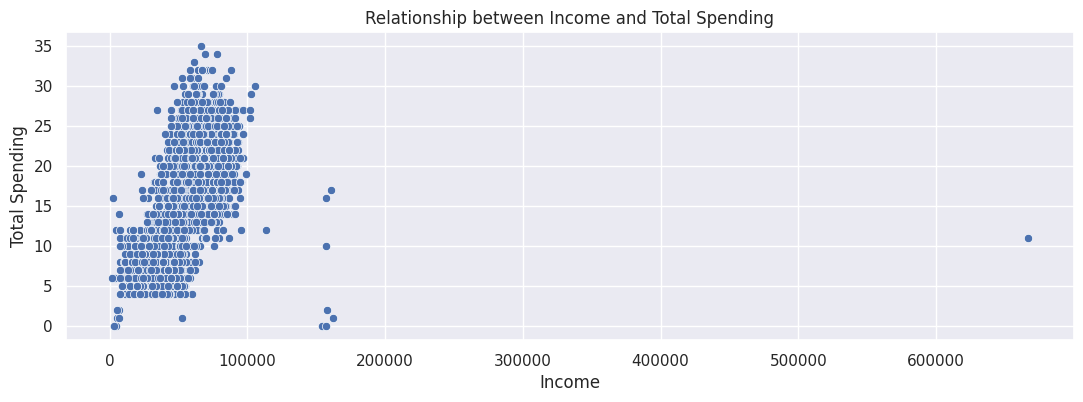

In [ ]:
# Storing the total spending in a new variable
df_superstore['Total_spent']=df_superstore[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Plotting scatter plot for Income vs total spending
plt.figure(figsize=(13, 4))
sns.scatterplot(x='Income', y='Total_spent', data=df_superstore)
plt.title('Relationship between Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

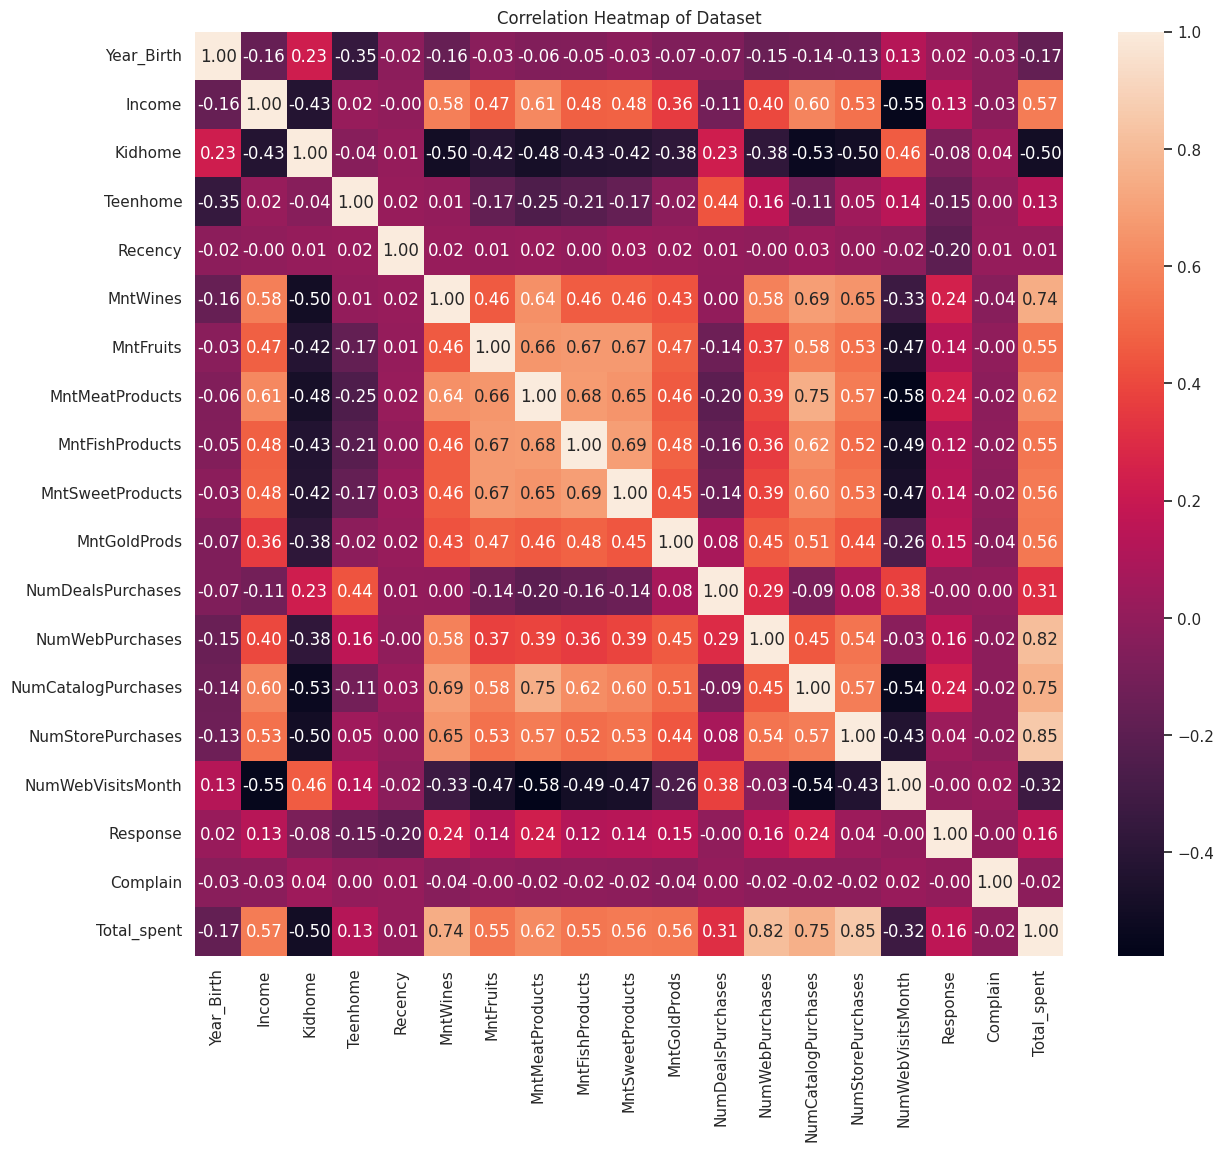

In [ ]:
corr_selected=df_superstore[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Total_spent']]
corr_selected=corr_selected.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(corr_selected, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Dataset')
plt.show()


## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

*1. Website Optimisation*

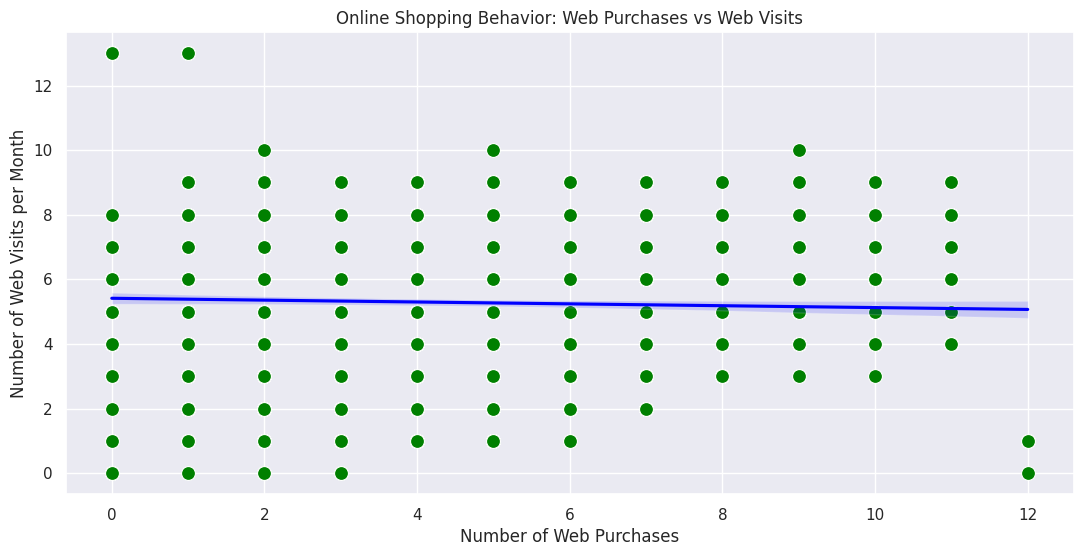

In [ ]:
# Online Shopping Behaviour
plt.figure(figsize=(13, 6))
sns.scatterplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=df_superstore, s=100, color='green')
sns.regplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=df_superstore, scatter=False, color='blue')
plt.title('Online Shopping Behavior: Web Purchases vs Web Visits')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Number of Web Visits per Month')
plt.show()

*Insights from the visualizations:*

*   *Less money is being spent online by customers who visit websites more frequently each month. This implies that an increase in online views may not always result in an increase in transactions.*

*   *Even with repeated visits, there can be problems or obstacles on the website that prevent users from finishing their purchases. It might have to do with the checkout procedure, user interface, or other elements of the online buying experience.*

*2. In-store Shopping Experience*

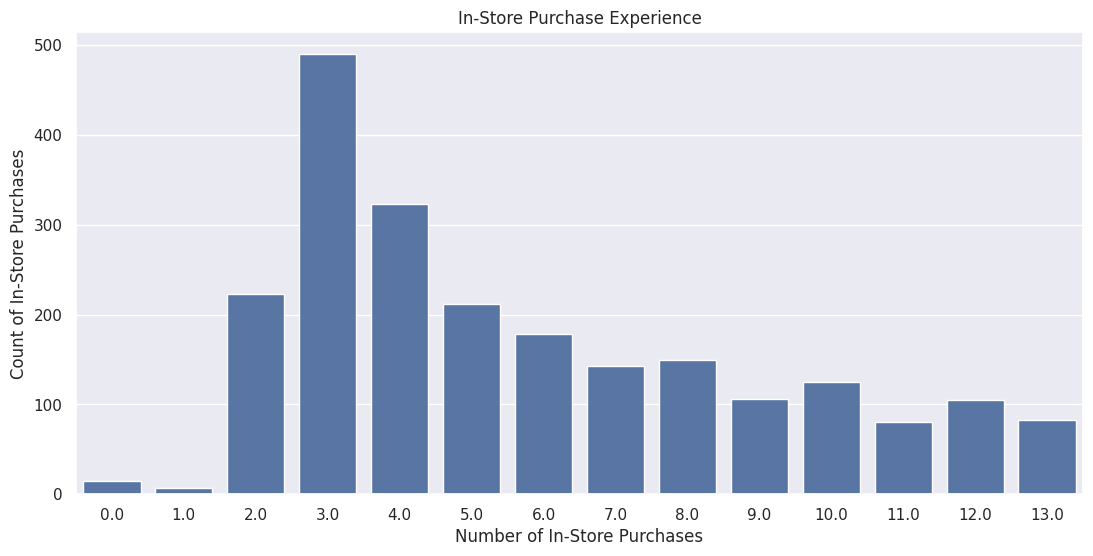

In [ ]:
# Count plot for in-store purchases
plt.figure(figsize=(13, 6))
sns.countplot(x='NumStorePurchases', data=df_superstore)
plt.title('In-Store Purchase Experience')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Count of In-Store Purchases')
plt.show()

*Insights from the visualizations:*

*   *The distribution of consumers based on the quantity of in-store purchases is shown in the count plot determine which client groupings tend to make a substantial amount of in-store purchases.*

*   *As the distribution suggests, concentrate on improving the in-store experience for customers who make fewer in-store transactions. To promote return business and sales, think about introducing loyalty programs, customized incentives, or unique in-store promotions.*

*3. loyality buying customer*

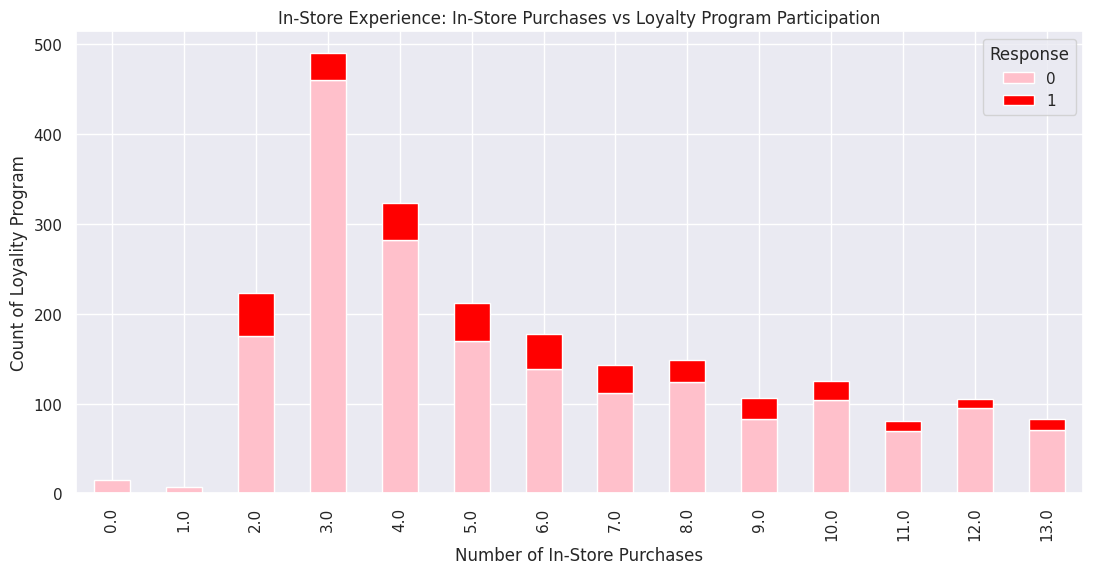

In [ ]:
# Bar plot for participation in loyalty programs based on in-store purchases
loyalty_counts=df_superstore.groupby('NumStorePurchases')['Response'].value_counts().unstack()
loyalty_counts.plot(kind='bar', stacked=True, color=['pink', 'red'], figsize=(13, 6))
plt.title('In-Store Experience: In-Store Purchases vs Loyalty Program Participation')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Count of Loyality Program')
plt.legend(title='Response')
plt.show()

*Insights from this visualization are:*

*   *Customers who make more in-store purchases tend to participate in loyalty programs at higher rates, which suggests that these programs are successful in keeping these customers.*

*   *The bar plot contrasts, at varying amounts of in-store purchases, the response to loyalty program participation ('Response').*



*4. Category wise Marketing Campaigns*

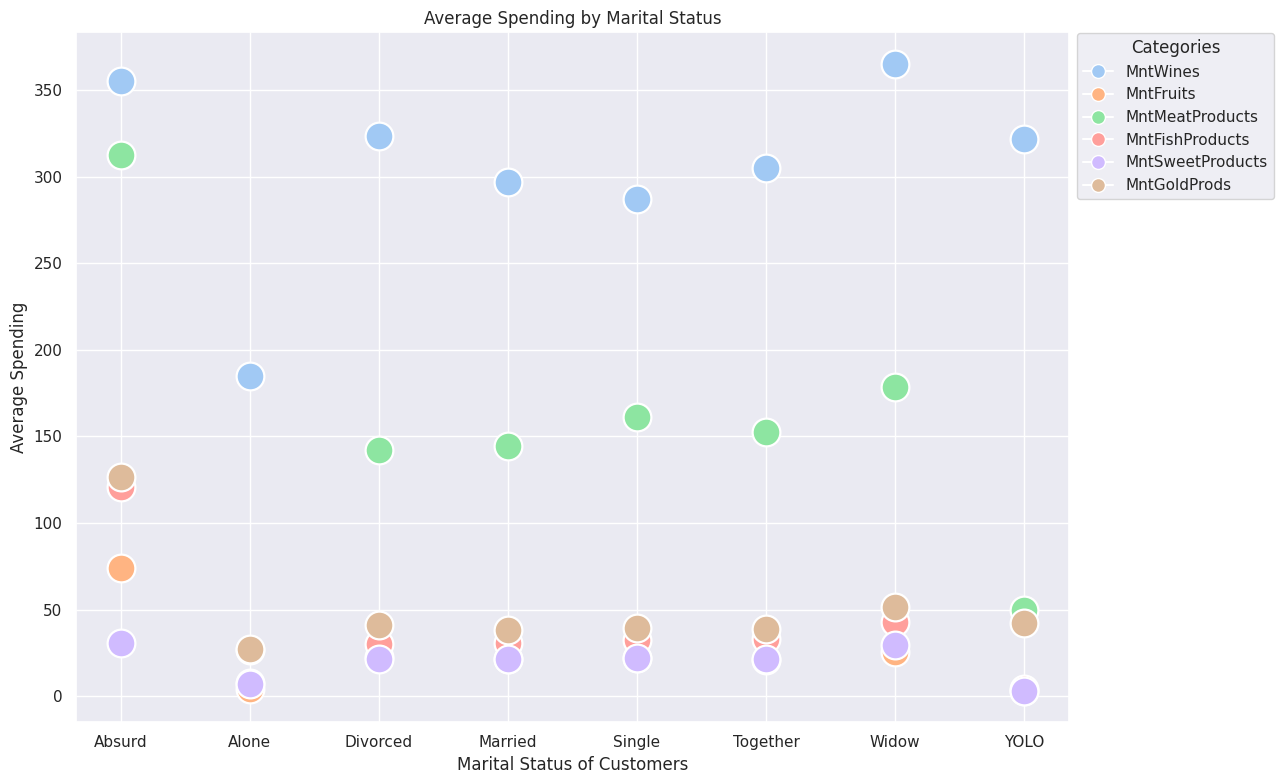

In [ ]:
# Selecting spending columns excluding non-relevant columns
selected_columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate average spending for each marital status category across all spending categories
avg_spending_by_marital_status=df_superstore.groupby('Marital_Status')[selected_columns].mean().reset_index()

# Define colors for each spending category using a different palette
colors=sns.color_palette('pastel', n_colors=len(selected_columns))

plt.figure(figsize=(13, 8))
for i, col in enumerate(selected_columns):
    sns.scatterplot(x='Marital_Status', y=col, data=avg_spending_by_marital_status, marker='o', s=400, color=colors[i])

# Create custom legend with colors
legend_labels=[plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[i], markersize=10)
                 for i, label in enumerate(selected_columns)]

plt.title('Average Spending by Marital Status')
plt.xlabel('Marital Status of Customers')
plt.ylabel('Average Spending')
plt.legend(handles=legend_labels, title='Categories', bbox_to_anchor=(1, 1.01), loc='best')
plt.tight_layout()
plt.show()

*Insights from this visualization:*
*   *Determine which consumer categories are high-value and create marketing strategies that are tailored to their individual requirements and tastes.*
*   *Can adjust communication tactics to meet the demands and preferences of various customer segments by having a thorough awareness of the family structure of your clients.*



## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

**Created by:** Vishal Sinha Roy

**Email:** vishalsingha.r05@gmail.com